# Simulador zorros y conejos 

100% (100 of 100) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


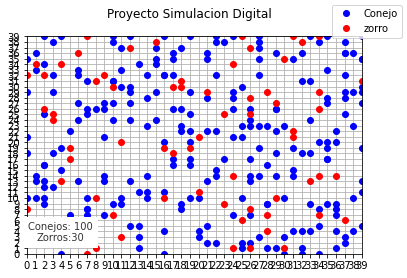

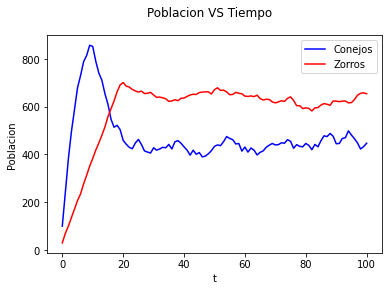

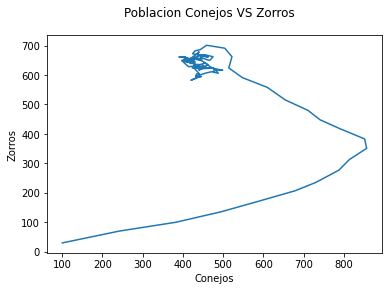

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as animation
from scipy import integrate
from progressbar import progressbar as prbar        
from copy import copy

CONEJOS = 0
ZORROS = 1

ARRIBA = 0
ABAJO = 1
IZQUIERDA = 2
DERECHA = 3
QUIETO = 4

# número inicial de conejos y zorros
nconejos = 100
nzorros = 30

# tamaño de la matriz
gridxsize = 40
gridysize = 40

# vida de un conejo/zorro recién nacido
vconejo = 10
vzorro = 20

# posibilidad de que se genere un nuevo conejo/zorro en un punto de cuadrícula en un paso
conejo_pos_natalidad = 0.1
zorro_pos_natalidad = 0.02

# número de pasos para simular
pasos = 100


class Animal(object):
    """
     Realiza un seguimiento de la posición, la vida, la especie (conejo/zorro) y el estado (vivo/muerto) del animal.   
    """

    def __init__(self, x0, y0, init_vida, especies):
        self.x = x0
        self.y = y0
        self.vida = init_vida
        self.especies = especies
        self.isDead = False


    def interact(self, other):
        """
        Interactuar con otro animal:
            - Si son de la misma especie, ignórense unos a otros.
            - El zorro come conejo.
        """
        if self.especies == CONEJOS and other.especies == ZORROS:
            self.morido()

        elif self.especies == ZORROS and other.especies == CONEJOS:
            other.morido()



    def morido(self):
        "morido"
        self.isDead = True


    def move(self, direction):
        """Mueve un paso en la matriz. Cada paso consume 1 de vida; si no queda vida, muere.
         Si llega a los límites de la matriz, "salte hacia atrás", dé un paso en la dirección opuesta insertada.

         Argumentos:
             dirección {int} -- dirección para moverse: ARRIBA: 0, ABAJO: 1, IZQUIERDA: 2, DERECHA: 3, quedarse: 4
        """
        self.vida -= 1

        if direction == IZQUIERDA:
            self.x += 1 if self.x > 0 else -1   #"retroceder"
        if direction == DERECHA:
            self.x -= 1 if self.x < gridxsize-1 else -1
        if direction == ARRIBA:
            self.y += 1 if self.y < gridysize-1 else -1
        if direction == ABAJO:
            self.y -= 1 if self.y > 0 else -1
        if direction == QUIETO:
            pass

        if self.vida <= 0:
            self.morido()          #D.E.P.



animales = []        #Contener todos los animales del grafico


# Todas las posibles pares de coordenadas
xcoords = np.arange(gridxsize)
ycoords = np.arange(gridysize)
coords = np.transpose([np.tile(xcoords, len(ycoords)), np.repeat(ycoords, len(xcoords))])

#Rellenar la matriz de forma aleatoria, con ubicaciones unicas para cada animal
randcoords = np.random.permutation(coords)
conejocoords = randcoords[:nconejos]
zorcoords = randcoords[nconejos:(nconejos + nzorros)]

for (x, y) in conejocoords:
    animales.append(Animal(x0=x, y0=y, init_vida=vconejo, especies=CONEJOS))
for (x, y) in zorcoords:
    animales.append(Animal(x0=x, y0=y, init_vida=vzorro, especies=ZORROS))


t_concoordsx = []   #Almacenar las coordenadas de los animales
t_concoordsy = []
t_zorcoordsx = []
t_zorcoordsy = []

conejonums, zornums = [nconejos], [nzorros]  #Almacenar el numero de animales

animfigs = []

for i in prbar(range(pasos), max_value = pasos, redirect_stdout=True):          # NOTE: substitute with for i in range(pasos) if progressbar2 is not installed

    #Iteracion con los animales en una unica posicion 
    direcciones = np.random.randint(0, 5, size=len(animales))
    for animal, direction in zip(animales, direcciones):
        animal.move(direction)

    #Generar conejos
    conejo_is_born_here = np.random.rand(len(coords)) <= conejo_pos_natalidad
    newconejos = coords[conejo_is_born_here]
    for (x, y) in newconejos:
        animales.append(Animal(x0=x, y0=y, init_vida=vconejo, especies=CONEJOS))

    #Generar Zorros
    naci_zorros = np.random.rand(len(coords)) <= zorro_pos_natalidad
    newzorros = coords[naci_zorros]
    for (x, y) in newzorros:
        animales.append(Animal(x0=x, y0=y, init_vida=vzorro, especies=ZORROS))

    #Interactuar al estar en la misma casilla
    for j, animal1 in enumerate(animales):
        for animal2 in animales[j:]:
            if (animal1.x == animal2.x and
                animal1.y == animal2.y):
                animal1.interact(animal2)

    #Limpiar cadaveres
    registro_muertes = []
    for j, animal in enumerate(animales):
        if animal.isDead:
            registro_muertes.append(j)
    animales = list(np.delete(animales, registro_muertes))

    #Contar animales
    zornum, connum = 0,0
    for animal in animales:
        if animal.especies == CONEJOS:
            connum += 1
        elif animal.especies == ZORROS:
            zornum += 1
    conejonums.append(connum)
    zornums.append(zornum)
    # print(connum, zornum, len(registro_muertes))

    #Obtener direccion de animales
    concsx = []
    concsy = []
    zorcsx = []
    zorcsy = []
    for animal in animales:
        if animal.especies == CONEJOS:
            concsx.append(animal.x)
            concsy.append(animal.y)
            # ax.plot(, animal.y, 'bo')
        elif animal.especies == ZORROS:
            zorcsx.append(animal.x)
            zorcsy.append(animal.y)
            # ax.plot(animal.x, animal.y, 'ro')

    t_concoordsx.append(concsx)
    t_concoordsy.append(concsy)
    t_zorcoordsx.append(zorcsx)
    t_zorcoordsy.append(zorcsy)


#Mostrar el movimiento
fig, ax = plt.subplots()
fig.suptitle("Proyecto Simulacion Digital")
ax.set_xlim(0, gridxsize-1)
ax.set_ylim(0, gridysize-1)
ax.set_xticks(xcoords)
ax.set_yticks(ycoords)
plt.grid(True)

conpc, = ax.plot(t_concoordsx[0], t_concoordsy[0], 'bo', label='Conejo')
zorpc, = ax.plot(t_zorcoordsx[0], t_zorcoordsy[0], 'ro', label='zorro')
fig.legend()

txt = ax.text(0.1, 0.1,'', ha='center', va='center', alpha=0.8,
              transform=ax.transAxes, fontdict={'color':'black', 'backgroundcolor': 'white', 'size': 10})

#Iniciar la animacion
def anim_init():
    conpc.set_data(t_concoordsx[0], t_concoordsy[0])
    zorpc.set_data(t_zorcoordsx[0], t_zorcoordsy[0])
    txt.set_text('Conejos: {}\nZorros:{}'.format(conejonums[0], zornums[0]))
    return conpc, zorpc, txt

#Actualizar el grafico
def animate(i):
    conpc.set_data(t_concoordsx[i], t_concoordsy[i])
    zorpc.set_data(t_zorcoordsx[i], t_zorcoordsy[i])
    txt.set_text('Conejos: {}\nZorros:{}'.format(conejonums[i], zornums[i]))
    return conpc, zorpc, txt

#Construir animacion
im_ani = animation.FuncAnimation(fig, animate, init_func=anim_init, frames=pasos,
            interval=500, repeat=False, save_count=10, blit=True)
plt.show()


#Graficar tiempo VS Poblacion
plt.plot(conejonums, 'b-', label="Conejos",)
plt.plot(zornums, 'r-', label="Zorros")
plt.xlabel('t')
plt.ylabel('Poblacion')
plt.suptitle("Poblacion VS Tiempo")
plt.legend()
plt.show()

#Matriz Conejos VS Zorros
plt.suptitle("Poblacion Conejos VS Zorros")
plt.plot(conejonums, zornums)
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.show()

# Modelo predador-presa de Lotka-Volterra

In [ ]:
# Modelo predador-presa de Lotka-Volterra
# Sistemas EDO con Runge Kutta de 2do Orden
import numpy as np

def rungekutta2_fg(f,g,t0,x0,y0,h,muestras):
    tamano = muestras +1
    tabla = np.zeros(shape=(tamano,3),dtype=float)
    tabla[0] = [t0,x0,y0]
    ti = t0
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1x = h * f(ti,xi,yi)
        K1y = h * g(ti,xi,yi)
        
        K2x = h * f(ti+h, xi + K1x, yi+K1y)
        K2y = h * g(ti+h, xi + K1x, yi+K1y)

        xi = xi + (1/2)*(K1x+K2x)
        yi = yi + (1/2)*(K1y+K2y)
        ti = ti + h
        
        tabla[i] = [ti,xi,yi]
    tabla = np.array(tabla)
    return(tabla)

# PROGRAMA ------------------

# INGRESO
# Parámetros de las ecuaciones
a = 0.5
b = 0.7
c = 0.35
d = 0.35

# Ecuaciones
f = lambda t,x,y : a*x -b*x*y
g = lambda t,x,y : -c*y + d*x*y

# Condiciones iniciales
t0 = 0
x0 = 2
y0 = 1

# parámetros del algoritmo
h = 0.5
muestras = 100

# PROCEDIMIENTO
tabla = rungekutta2_fg(f,g,t0,x0,y0,h,muestras)
ti = tabla[:,0]
xi = tabla[:,1]
yi = tabla[:,2]

# SALIDA
np.set_printoptions(precision=6)
print(' [ ti, xi, yi]')
print(tabla)

  0% (23 of 4000) |             | Elapsed Time: 5:17:55 ETA:  866 days, 7:15:01

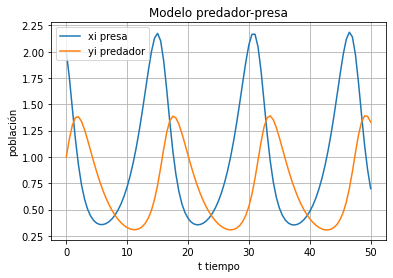

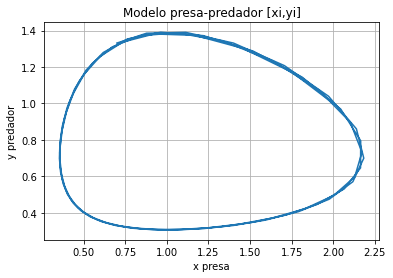

In [ ]:
# Grafica tiempos vs población
import matplotlib.pyplot as plt

plt.plot(ti,xi, label='xi presa')
plt.plot(ti,yi, label='yi predador')

plt.title('Modelo predador-presa')
plt.xlabel('t tiempo')
plt.ylabel('población')
plt.legend()
plt.grid()
plt.show()

# gráfica xi vs yi
plt.plot(xi,yi)

plt.title('Modelo presa-predador [xi,yi]')
plt.xlabel('x presa')
plt.ylabel('y predador')
plt.grid()
plt.show()